## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  75.069315   949.832156  0.847278  6.207317  1.526572
1  85.805195   382.865158  0.536601  1.270384  1.151363
2  58.157950   403.007097  0.499546  8.853704  1.240231
3  29.240721  1330.410258  0.640499  6.192712  1.673649
4   9.806462   377.739130  0.814706  7.248586  1.751314


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.16951 | train_mse: 4.83824 | train_mae: 1.68081 |  0:00:00s
epoch 1  | loss: 0.77726 | train_mse: 7.66526 | train_mae: 1.9825  |  0:00:00s
epoch 2  | loss: 0.73113 | train_mse: 8.79147 | train_mae: 1.97109 |  0:00:00s


epoch 3  | loss: 0.53273 | train_mse: 9.51514 | train_mae: 2.30969 |  0:00:00s
epoch 4  | loss: 0.59321 | train_mse: 7.77634 | train_mae: 2.10046 |  0:00:00s
epoch 5  | loss: 0.4824  | train_mse: 6.37116 | train_mae: 1.87593 |  0:00:00s
epoch 6  | loss: 0.36158 | train_mse: 4.50793 | train_mae: 1.57832 |  0:00:00s
epoch 7  | loss: 0.64119 | train_mse: 2.6128  | train_mae: 1.17661 |  0:00:00s


epoch 8  | loss: 0.30058 | train_mse: 2.39735 | train_mae: 1.11448 |  0:00:00s
epoch 9  | loss: 0.28028 | train_mse: 2.23864 | train_mae: 1.0933  |  0:00:00s
epoch 10 | loss: 0.30046 | train_mse: 1.92158 | train_mae: 1.00269 |  0:00:00s


epoch 11 | loss: 0.24503 | train_mse: 1.23955 | train_mae: 0.79306 |  0:00:00s
epoch 12 | loss: 0.24997 | train_mse: 1.3066  | train_mae: 0.78095 |  0:00:01s
epoch 13 | loss: 0.31912 | train_mse: 1.17971 | train_mae: 0.72536 |  0:00:01s


epoch 14 | loss: 0.22117 | train_mse: 0.98236 | train_mae: 0.72727 |  0:00:01s
epoch 15 | loss: 0.26076 | train_mse: 0.63232 | train_mae: 0.61666 |  0:00:01s
epoch 16 | loss: 0.17298 | train_mse: 0.51233 | train_mae: 0.55338 |  0:00:01s


epoch 17 | loss: 0.31253 | train_mse: 0.68652 | train_mae: 0.60991 |  0:00:01s
epoch 18 | loss: 0.20755 | train_mse: 0.67917 | train_mae: 0.57807 |  0:00:01s
epoch 19 | loss: 0.21181 | train_mse: 0.59735 | train_mae: 0.53672 |  0:00:01s


epoch 20 | loss: 0.14413 | train_mse: 0.40897 | train_mae: 0.47184 |  0:00:01s
epoch 21 | loss: 0.22265 | train_mse: 0.30507 | train_mae: 0.43514 |  0:00:01s
epoch 22 | loss: 0.24255 | train_mse: 0.14341 | train_mae: 0.32176 |  0:00:01s


epoch 23 | loss: 0.13065 | train_mse: 0.15378 | train_mae: 0.32198 |  0:00:01s
epoch 24 | loss: 0.14251 | train_mse: 0.21925 | train_mae: 0.36106 |  0:00:02s
epoch 25 | loss: 0.19725 | train_mse: 0.25769 | train_mae: 0.38672 |  0:00:02s


epoch 26 | loss: 0.15106 | train_mse: 0.28213 | train_mae: 0.40036 |  0:00:02s
epoch 27 | loss: 0.29702 | train_mse: 0.23706 | train_mae: 0.36934 |  0:00:02s


epoch 28 | loss: 0.18744 | train_mse: 0.12876 | train_mae: 0.27981 |  0:00:02s
epoch 29 | loss: 0.21368 | train_mse: 0.12814 | train_mae: 0.27869 |  0:00:02s


epoch 30 | loss: 0.18586 | train_mse: 0.1253  | train_mae: 0.27708 |  0:00:02s
epoch 31 | loss: 0.1495  | train_mse: 0.12745 | train_mae: 0.29071 |  0:00:02s
epoch 32 | loss: 0.29506 | train_mse: 0.10857 | train_mae: 0.27671 |  0:00:02s


epoch 33 | loss: 0.15803 | train_mse: 0.11323 | train_mae: 0.29199 |  0:00:03s
epoch 34 | loss: 0.17286 | train_mse: 0.15988 | train_mae: 0.32069 |  0:00:03s
epoch 35 | loss: 0.10704 | train_mse: 0.17547 | train_mae: 0.32217 |  0:00:03s
epoch 36 | loss: 0.25065 | train_mse: 0.23333 | train_mae: 0.35462 |  0:00:03s


epoch 37 | loss: 0.22891 | train_mse: 0.24975 | train_mae: 0.36447 |  0:00:03s
epoch 38 | loss: 0.15116 | train_mse: 0.17826 | train_mae: 0.31469 |  0:00:03s
epoch 39 | loss: 0.15004 | train_mse: 0.10824 | train_mae: 0.26121 |  0:00:03s
epoch 40 | loss: 0.18328 | train_mse: 0.11155 | train_mae: 0.2651  |  0:00:03s


epoch 41 | loss: 0.20624 | train_mse: 0.13571 | train_mae: 0.28598 |  0:00:03s
epoch 42 | loss: 0.18542 | train_mse: 0.13913 | train_mae: 0.28293 |  0:00:03s
epoch 43 | loss: 0.17158 | train_mse: 0.10595 | train_mae: 0.25889 |  0:00:03s
epoch 44 | loss: 0.12659 | train_mse: 0.10099 | train_mae: 0.24911 |  0:00:03s


epoch 45 | loss: 0.17723 | train_mse: 0.09822 | train_mae: 0.2524  |  0:00:03s
epoch 46 | loss: 0.50121 | train_mse: 0.08734 | train_mae: 0.2414  |  0:00:03s
epoch 47 | loss: 0.39694 | train_mse: 0.11383 | train_mae: 0.26967 |  0:00:03s


epoch 48 | loss: 0.20984 | train_mse: 0.09778 | train_mae: 0.2505  |  0:00:04s
epoch 49 | loss: 0.15536 | train_mse: 0.09613 | train_mae: 0.24316 |  0:00:04s
epoch 50 | loss: 0.22736 | train_mse: 0.10009 | train_mae: 0.2517  |  0:00:04s
epoch 51 | loss: 0.22094 | train_mse: 0.09411 | train_mae: 0.24526 |  0:00:04s


epoch 52 | loss: 0.18744 | train_mse: 0.11999 | train_mae: 0.26452 |  0:00:04s
epoch 53 | loss: 0.13443 | train_mse: 0.14637 | train_mae: 0.28875 |  0:00:04s
epoch 54 | loss: 0.27919 | train_mse: 0.12682 | train_mae: 0.28142 |  0:00:04s
epoch 55 | loss: 0.12268 | train_mse: 0.09731 | train_mae: 0.24797 |  0:00:04s


epoch 56 | loss: 0.17641 | train_mse: 0.07536 | train_mae: 0.21687 |  0:00:04s
epoch 57 | loss: 0.09669 | train_mse: 0.06427 | train_mae: 0.19494 |  0:00:04s
epoch 58 | loss: 0.20356 | train_mse: 0.07    | train_mae: 0.20891 |  0:00:04s
epoch 59 | loss: 0.11693 | train_mse: 0.06817 | train_mae: 0.20736 |  0:00:04s


epoch 60 | loss: 0.18171 | train_mse: 0.07437 | train_mae: 0.21746 |  0:00:04s
epoch 61 | loss: 0.16897 | train_mse: 0.11008 | train_mae: 0.27239 |  0:00:04s
epoch 62 | loss: 0.33667 | train_mse: 0.11759 | train_mae: 0.28195 |  0:00:04s


epoch 63 | loss: 0.12201 | train_mse: 0.10777 | train_mae: 0.25609 |  0:00:05s
epoch 64 | loss: 0.14611 | train_mse: 0.09476 | train_mae: 0.23652 |  0:00:05s
epoch 65 | loss: 0.2104  | train_mse: 0.07603 | train_mae: 0.21512 |  0:00:05s
epoch 66 | loss: 0.08685 | train_mse: 0.07421 | train_mae: 0.21017 |  0:00:05s
epoch 67 | loss: 0.14978 | train_mse: 0.07649 | train_mae: 0.21766 |  0:00:05s


epoch 68 | loss: 0.16616 | train_mse: 0.0985  | train_mae: 0.25077 |  0:00:05s
epoch 69 | loss: 0.24614 | train_mse: 0.10016 | train_mae: 0.24793 |  0:00:05s
epoch 70 | loss: 0.09588 | train_mse: 0.10142 | train_mae: 0.24497 |  0:00:05s
epoch 71 | loss: 0.15339 | train_mse: 0.12437 | train_mae: 0.25889 |  0:00:05s


epoch 72 | loss: 0.15519 | train_mse: 0.14788 | train_mae: 0.27804 |  0:00:05s
epoch 73 | loss: 0.12603 | train_mse: 0.10307 | train_mae: 0.23982 |  0:00:05s
epoch 74 | loss: 0.1187  | train_mse: 0.07707 | train_mae: 0.20734 |  0:00:05s
epoch 75 | loss: 0.23571 | train_mse: 0.10948 | train_mae: 0.25285 |  0:00:05s


epoch 76 | loss: 0.20358 | train_mse: 0.11702 | train_mae: 0.24484 |  0:00:05s
epoch 77 | loss: 0.07095 | train_mse: 0.08335 | train_mae: 0.21226 |  0:00:05s
epoch 78 | loss: 0.25343 | train_mse: 0.08789 | train_mae: 0.22214 |  0:00:06s


epoch 79 | loss: 0.1522  | train_mse: 0.1125  | train_mae: 0.24666 |  0:00:06s
epoch 80 | loss: 0.24271 | train_mse: 0.09169 | train_mae: 0.23292 |  0:00:06s
epoch 81 | loss: 0.19325 | train_mse: 0.1204  | train_mae: 0.25785 |  0:00:06s
epoch 82 | loss: 0.26296 | train_mse: 0.1376  | train_mae: 0.261   |  0:00:06s


epoch 83 | loss: 0.15952 | train_mse: 0.11575 | train_mae: 0.24431 |  0:00:06s
epoch 84 | loss: 0.12836 | train_mse: 0.09332 | train_mae: 0.22499 |  0:00:06s
epoch 85 | loss: 0.31061 | train_mse: 0.10133 | train_mae: 0.2336  |  0:00:06s
epoch 86 | loss: 0.09064 | train_mse: 0.10609 | train_mae: 0.23827 |  0:00:06s


epoch 87 | loss: 0.15184 | train_mse: 0.12615 | train_mae: 0.26862 |  0:00:06s
epoch 88 | loss: 0.40478 | train_mse: 0.11977 | train_mae: 0.26172 |  0:00:06s
epoch 89 | loss: 0.25645 | train_mse: 0.13289 | train_mae: 0.25745 |  0:00:06s
epoch 90 | loss: 0.1753  | train_mse: 0.11804 | train_mae: 0.24611 |  0:00:06s


epoch 91 | loss: 0.12952 | train_mse: 0.07882 | train_mae: 0.21084 |  0:00:06s
epoch 92 | loss: 0.10422 | train_mse: 0.06976 | train_mae: 0.1913  |  0:00:06s
epoch 93 | loss: 0.0936  | train_mse: 0.07482 | train_mae: 0.20545 |  0:00:07s


epoch 94 | loss: 0.13807 | train_mse: 0.10114 | train_mae: 0.22927 |  0:00:07s
epoch 95 | loss: 0.17938 | train_mse: 0.08072 | train_mae: 0.21651 |  0:00:07s
epoch 96 | loss: 0.22094 | train_mse: 0.07881 | train_mae: 0.22091 |  0:00:07s
epoch 97 | loss: 0.09803 | train_mse: 0.08953 | train_mae: 0.23786 |  0:00:07s


epoch 98 | loss: 0.22673 | train_mse: 0.0845  | train_mae: 0.23311 |  0:00:07s
epoch 99 | loss: 0.08555 | train_mse: 0.09924 | train_mae: 0.24263 |  0:00:07s
epoch 100| loss: 0.11689 | train_mse: 0.0876  | train_mae: 0.24423 |  0:00:07s
epoch 101| loss: 0.09704 | train_mse: 0.06764 | train_mae: 0.21705 |  0:00:07s


epoch 102| loss: 0.09402 | train_mse: 0.05526 | train_mae: 0.19328 |  0:00:07s
epoch 103| loss: 0.1294  | train_mse: 0.0734  | train_mae: 0.20797 |  0:00:07s
epoch 104| loss: 0.11394 | train_mse: 0.08608 | train_mae: 0.21858 |  0:00:07s
epoch 105| loss: 0.27403 | train_mse: 0.05663 | train_mae: 0.19636 |  0:00:07s


epoch 106| loss: 0.16431 | train_mse: 0.06506 | train_mae: 0.20015 |  0:00:07s
epoch 107| loss: 0.11823 | train_mse: 0.07336 | train_mae: 0.20722 |  0:00:07s
epoch 108| loss: 0.23866 | train_mse: 0.08067 | train_mae: 0.20506 |  0:00:08s
epoch 109| loss: 0.14202 | train_mse: 0.06691 | train_mae: 0.18772 |  0:00:08s


epoch 110| loss: 0.11551 | train_mse: 0.0596  | train_mae: 0.17707 |  0:00:08s
epoch 111| loss: 0.13522 | train_mse: 0.06832 | train_mae: 0.19445 |  0:00:08s
epoch 112| loss: 0.14317 | train_mse: 0.07535 | train_mae: 0.20216 |  0:00:08s
epoch 113| loss: 0.10355 | train_mse: 0.0906  | train_mae: 0.22791 |  0:00:08s


epoch 114| loss: 0.12506 | train_mse: 0.11262 | train_mae: 0.25189 |  0:00:08s
epoch 115| loss: 0.13216 | train_mse: 0.11098 | train_mae: 0.24558 |  0:00:08s
epoch 116| loss: 0.12    | train_mse: 0.10223 | train_mae: 0.2326  |  0:00:08s
epoch 117| loss: 0.18096 | train_mse: 0.10819 | train_mae: 0.23849 |  0:00:08s


epoch 118| loss: 0.1421  | train_mse: 0.06388 | train_mae: 0.19886 |  0:00:08s
epoch 119| loss: 0.13315 | train_mse: 0.07243 | train_mae: 0.21325 |  0:00:08s
epoch 120| loss: 0.18566 | train_mse: 0.09806 | train_mae: 0.24487 |  0:00:08s
epoch 121| loss: 0.1216  | train_mse: 0.11601 | train_mae: 0.26025 |  0:00:08s


epoch 122| loss: 0.22226 | train_mse: 0.09562 | train_mae: 0.23592 |  0:00:08s
epoch 123| loss: 0.11318 | train_mse: 0.09363 | train_mae: 0.23198 |  0:00:09s
epoch 124| loss: 0.12804 | train_mse: 0.12001 | train_mae: 0.26007 |  0:00:09s
epoch 125| loss: 0.12206 | train_mse: 0.08407 | train_mae: 0.21961 |  0:00:09s


epoch 126| loss: 0.09826 | train_mse: 0.07664 | train_mae: 0.21627 |  0:00:09s
epoch 127| loss: 0.08319 | train_mse: 0.08333 | train_mae: 0.22492 |  0:00:09s
epoch 128| loss: 0.10594 | train_mse: 0.09491 | train_mae: 0.23883 |  0:00:09s
epoch 129| loss: 0.13658 | train_mse: 0.1015  | train_mae: 0.23861 |  0:00:09s


epoch 130| loss: 0.38517 | train_mse: 0.12457 | train_mae: 0.25385 |  0:00:09s
epoch 131| loss: 0.24578 | train_mse: 0.18614 | train_mae: 0.28218 |  0:00:09s
epoch 132| loss: 0.17593 | train_mse: 0.09384 | train_mae: 0.22634 |  0:00:09s
epoch 133| loss: 0.14346 | train_mse: 0.0693  | train_mae: 0.19146 |  0:00:09s


epoch 134| loss: 0.11146 | train_mse: 0.11058 | train_mae: 0.25996 |  0:00:09s
epoch 135| loss: 0.26202 | train_mse: 0.10352 | train_mae: 0.25065 |  0:00:09s


epoch 136| loss: 0.25251 | train_mse: 0.07932 | train_mae: 0.2179  |  0:00:10s
epoch 137| loss: 0.12754 | train_mse: 0.08442 | train_mae: 0.2199  |  0:00:10s
epoch 138| loss: 0.09836 | train_mse: 0.10981 | train_mae: 0.25212 |  0:00:10s


epoch 139| loss: 0.13268 | train_mse: 0.09756 | train_mae: 0.23822 |  0:00:10s
epoch 140| loss: 0.16615 | train_mse: 0.07317 | train_mae: 0.20157 |  0:00:10s
epoch 141| loss: 0.14141 | train_mse: 0.06944 | train_mae: 0.20635 |  0:00:10s
epoch 142| loss: 0.11251 | train_mse: 0.07568 | train_mae: 0.2139  |  0:00:10s


epoch 143| loss: 0.12874 | train_mse: 0.08811 | train_mae: 0.22042 |  0:00:10s
epoch 144| loss: 0.12737 | train_mse: 0.13097 | train_mae: 0.25237 |  0:00:10s
epoch 145| loss: 0.14531 | train_mse: 0.1754  | train_mae: 0.29574 |  0:00:10s
epoch 146| loss: 0.16711 | train_mse: 0.1817  | train_mae: 0.29477 |  0:00:10s


epoch 147| loss: 0.11926 | train_mse: 0.1266  | train_mae: 0.2558  |  0:00:10s
epoch 148| loss: 0.13397 | train_mse: 0.12088 | train_mae: 0.24913 |  0:00:10s
epoch 149| loss: 0.11441 | train_mse: 0.14042 | train_mae: 0.26208 |  0:00:10s


epoch 150| loss: 0.08578 | train_mse: 0.13602 | train_mae: 0.25254 |  0:00:11s
epoch 151| loss: 0.0856  | train_mse: 0.11362 | train_mae: 0.23427 |  0:00:11s
epoch 152| loss: 0.09444 | train_mse: 0.10599 | train_mae: 0.22818 |  0:00:11s


epoch 153| loss: 0.04709 | train_mse: 0.09885 | train_mae: 0.22129 |  0:00:11s
epoch 154| loss: 0.08067 | train_mse: 0.08063 | train_mae: 0.20551 |  0:00:11s
epoch 155| loss: 0.08617 | train_mse: 0.07496 | train_mae: 0.19893 |  0:00:11s


epoch 156| loss: 0.16454 | train_mse: 0.09852 | train_mae: 0.2214  |  0:00:11s
epoch 157| loss: 0.09994 | train_mse: 0.09357 | train_mae: 0.2237  |  0:00:11s
epoch 158| loss: 0.09524 | train_mse: 0.10318 | train_mae: 0.24291 |  0:00:11s


epoch 159| loss: 0.27813 | train_mse: 0.0811  | train_mae: 0.22722 |  0:00:11s
epoch 160| loss: 0.08841 | train_mse: 0.09424 | train_mae: 0.23447 |  0:00:11s

Early stopping occurred at epoch 160 with best_epoch = 110 and best_train_mae = 0.17707
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

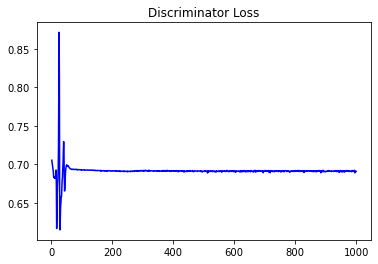

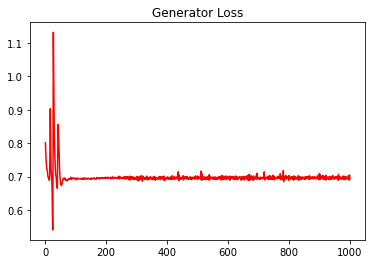

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.19763441441339571


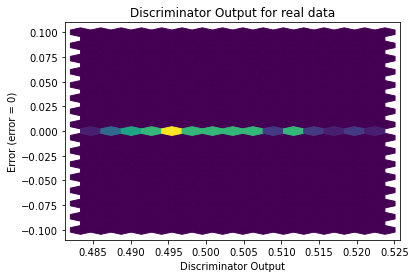

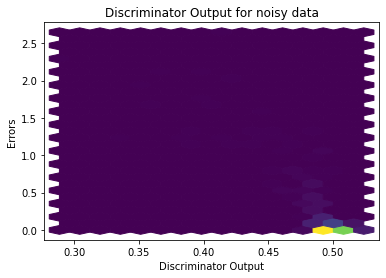

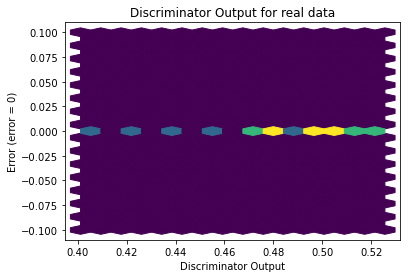

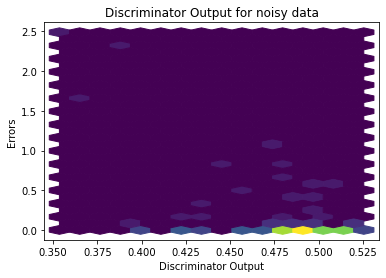

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


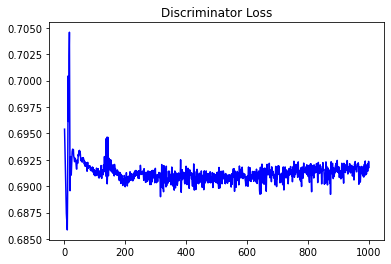

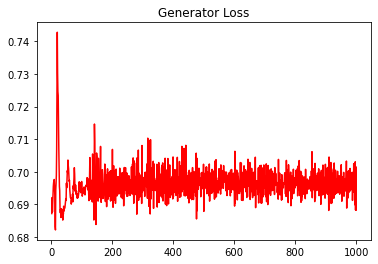

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.262811769046123


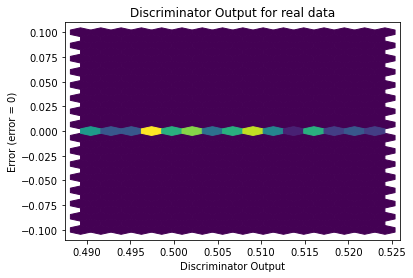

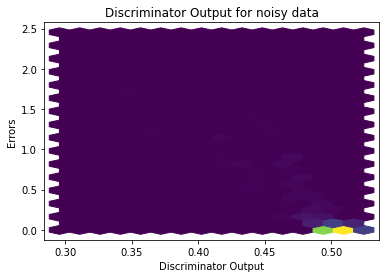

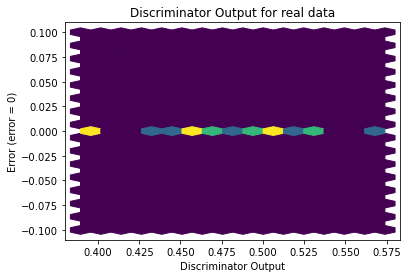

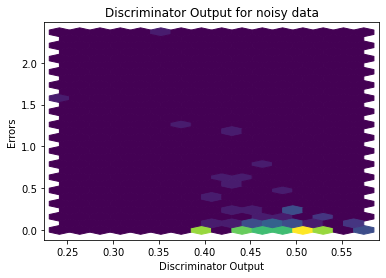

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5576]], requires_grad=True)
